In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [125]:
def computeStdRegionsPerTick(listAreaRegionsTicks):

    sigma = []

    for tick in range(len(listAreaRegionsTicks)):
        sigma.append(np.std(listAreaRegionsTicks[tick]))

    return sigma

In [178]:
def get_means_stds(directory):
    """
    Returns the list of ticks, list of means, and list of standard deviations of the Voronoi regions for the set of experiments in the given directory.
    """
    
    ticks = [] # approximate time in ticks of snapshots
    std_areas = []

    for (root, subdirs, files) in os.walk(directory):
        for subdir in subdirs:
            data = pd.read_csv(os.path.join(root, subdir, "data_voronoiData.csv"))
            
            # Take the lowest number of snapshots available across the different experiments
            if len(ticks) == 0 or len(ticks) > len(data["Tick"]):
                ticks = data["Tick"]
            std = computeStdRegionsPerTick(data[data.columns[1:]].to_numpy())
            
            if len(std) > len(ticks):
                std = std[:len(ticks) - len(std)]
            std_areas.append(std)
        break
    
    # Update the length of the standard deviation lists in std_areas in order to correspond to the number of snapshots
    for i in range(len(std_areas)):
        if len(std_areas[i]) > len(ticks):
            std_areas[i] = std_areas[i][:len(ticks) - len(std_areas[i])]
        
    std_areas = np.vstack(std_areas)
    means = std_areas.mean(axis=0)
    stds = std_areas.std(axis=0, ddof=1)
    
    return ticks, means, stds

In [191]:
def plot_sd_graph(directory1, directory2 = '', divide_by=1):
    # divide_by is an optional parameter introduced to correct errors in ticks in the second directory (video analyses), to be removed when this problem no longer occurs
    
    ticks, means, stds = get_means_stds(directory1)
    plt.plot(ticks, means, label=directory1)
    plt.fill_between(ticks, means - stds, means + stds, alpha=0.3)
    
    if directory2 != '':
        ticks, means, stds = get_means_stds(directory2)
        plt.plot(ticks/divide_by, means, label=directory2)
        plt.fill_between(ticks/divide_by, means - stds, means + stds, alpha=0.3)
    
    plt.xlabel("ticks (32 ticks = 1 second)")
    plt.ylabel("Average standard deviation of Voronoi areas (mm²)")
    plt.legend(loc="lower right")
    plt.ylim(0)
    plt.show()

The analyses below are for the set of 12 experiments we conducted on real kilobots, alongside 40 simulations conducted in kilombo. 
- d03 is the run and tumble algorithm which does not come to a stop over time. 
- d12 is the dispersion with convergence algorithm where the kilobots come to a stop when they have found a satisfactory position within the allocated budget of time.

There are 
- 3 sets of real experiments and 10 sets of simulated experiments for the disk arena, and 
- 3 sets with 10 sets of simulated experiments for the ring arena 

for each of these algorithms. 

Due to time constraints, these experiments were run over a period of 2.5 minutes each for d12 and 5 minutes each for d03. However, the d12 algorithm is known from our pre-tests to only converge to an interesting final position if given an hour to execute. 

Our chosen measure of dispersion is the standard deviation over time of the size of the kilobots' Voronoi regions. As such, we are looking for a value that is as close to zero as possible.

## Comparable experiments (short)

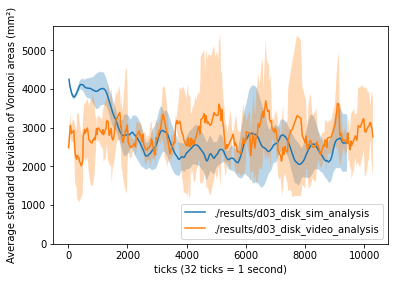

In [192]:
plot_sd_graph("./results/d03_disk_sim_analysis", "./results/d03_disk_video_analysis", divide_by=2)

The above analysis is a positive indicator that the performance of d03 on the disk arena is similar in simulation compared to real life.

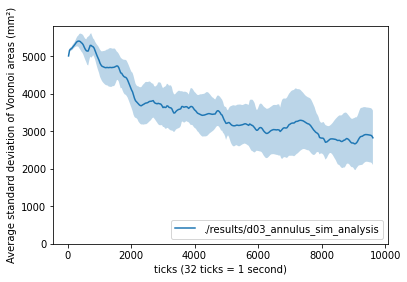

In [206]:
#plot_sd_graph("./results/d03_annulus_sim_analysis", "./results/d03_annulus_video_analysis", divide_by=2)
plot_sd_graph("./results/d03_annulus_sim_analysis", divide_by=2)

Unfortunately we were unable to obtain the positions of the kilobots in the ring arena for the real experiments due to a difficulty in the image analysis. We can observe however that d03 attains a performance of around 3000 in 10000 ticks which is a respectable value if compared to the performances in other experiments.

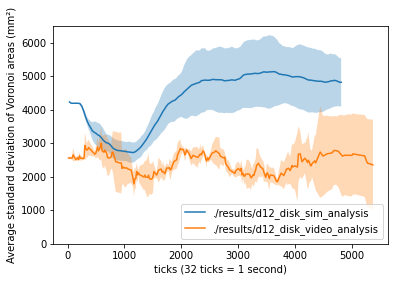

In [184]:
plot_sd_graph("./results/d12_disk_sim_analysis", "./results/d12_disk_video_analysis", divide_by=2)

This analysis seems to interestingly indicate that the d12 algorithm performs better in real life on the disk arena.

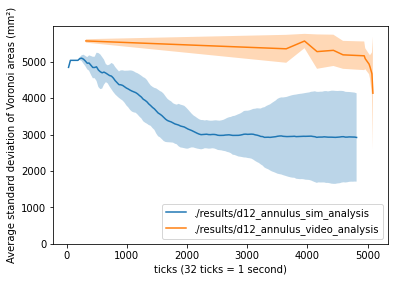

In [185]:
plot_sd_graph("./results/d12_annulus_sim_analysis", "./results/d12_annulus_video_analysis", divide_by=2)

The comparison above is difficult to interpret, but seems to indicate that the d12 algorithm performs very poorly on real kilobots (standard deviation above 5000mm²). It would be interesting to understand what the increase in performance at the end is due to (dip in average std). In simulation, the performance is also very variable as can be observed from the large error bands.

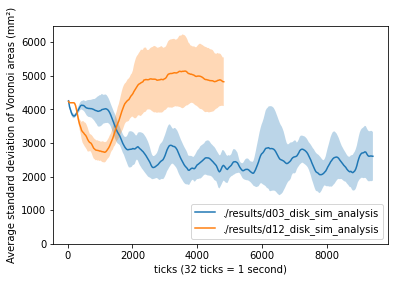

In [195]:
plot_sd_graph("./results/d03_disk_sim_analysis", "./results/d12_disk_sim_analysis")

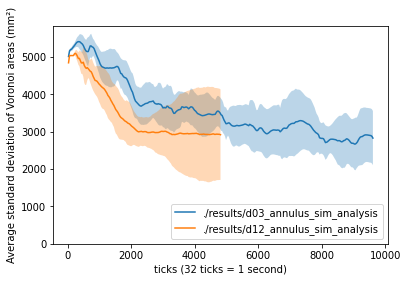

In [196]:
plot_sd_graph("./results/d03_annulus_sim_analysis", "./results/d12_annulus_sim_analysis")

The two graphs above compare the performance of the two algorithms under the same conditions in simulation. It would seem that d03 performs very well immediately compared to d12 on the disk arena. However, their performances seem comparable on the ring arena.

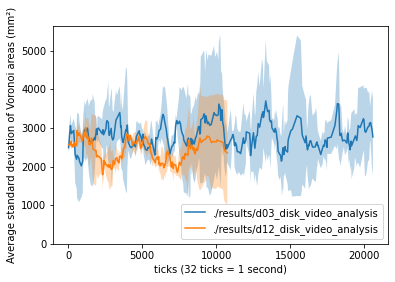

In [205]:
plot_sd_graph("./results/d03_disk_video_analysis", "./results/d12_disk_video_analysis")

Note: the ticks shown above are two times their real values.

The graph above seems to indicate that the two algorithms perform similarly on the disk arena in real life.

## Long experiments

Due to a lack of time and an unidentified problem with the execution of the d12 algorithm on real kilobots (they converge too quickly), very few long experiments were conducted on real kilobots. Despite being able to speed up simulation experiments, our bottleneck was due to the analysis of long simulation experiments taking a lot of time (around 15 minutes each). The results below are just a small sample to show the potential of the d12 algorithm if given more time.

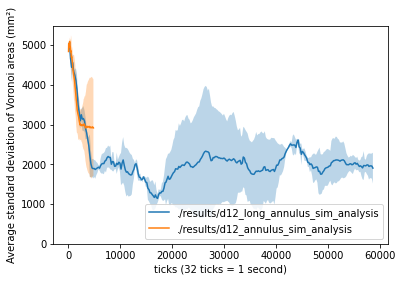

In [199]:
plot_sd_graph("./results/d12_long_annulus_sim_analysis", "./results/d12_annulus_sim_analysis")

The cell above compares the results obtained on 10 short simulations (5000 kiloticks) to the results obtained on 2 long simulations (60000 kiloticks). It shows that the d12 algorithm converges to a much better value (around 2000mm² of standard deviation between regions) when given enough time. This performance is better than any other performance measured above.

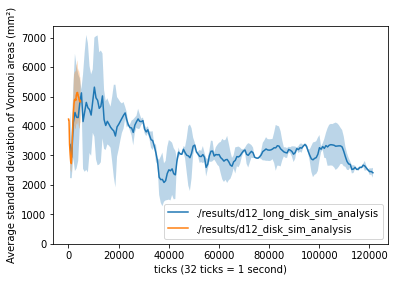

In [207]:
plot_sd_graph("./results/d12_long_disk_sim_analysis", "./results/d12_disk_sim_analysis")

The cell above compares the results obtained on 10 short simulations (5000 kiloticks) to the results obtained on 2 long simulations (100000 kiloticks). It again shows that the d12 algorithm converges to a much better value when given enough time.

As such, it would be interesting to analyse the performance of d12 on real kilobots if given enough time. It would also be interesting to analyse the average performance of a snapshot of the end of a d12 experiment after the kilobots reach their final positions.